In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")

#Descargar el set de datos de perros y gatos
datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

In [ ]:
#Imprimir los metadatos para revisarlos
metadatos

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='/root/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul

image  label
0  [[[242, 248, 248], [240, 246, 246], [235, 239,...      1
1  [[[215, 165, 114], [187, 135, 85], [232, 176, ...      1
2  [[[177, 183, 157], [185, 191, 165], [192, 198,...      1
3  [[[92, 66, 7], [93, 67, 8], [93, 67, 8], [93, ...      0
4  [[[140, 138, 141], [140, 138, 141], [141, 139,...      1
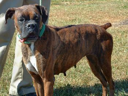
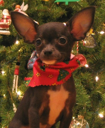
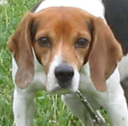
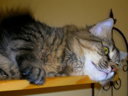
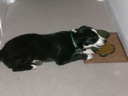

In [ ]:
#Una forma de mostrar 5 ejemplos del set
tfds.as_dataframe(datos['train'].take(5), metadatos)

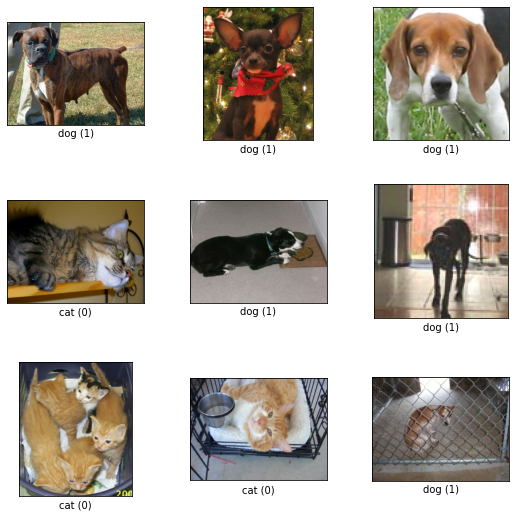

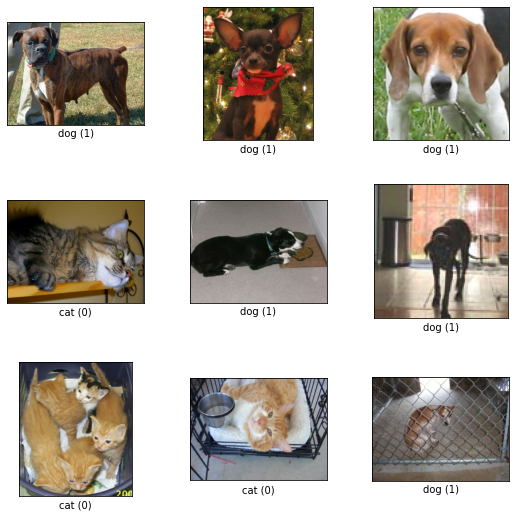

In [ ]:
#Otra forma de mostrar ejemplos del set
tfds.show_examples(datos['train'], metadatos)

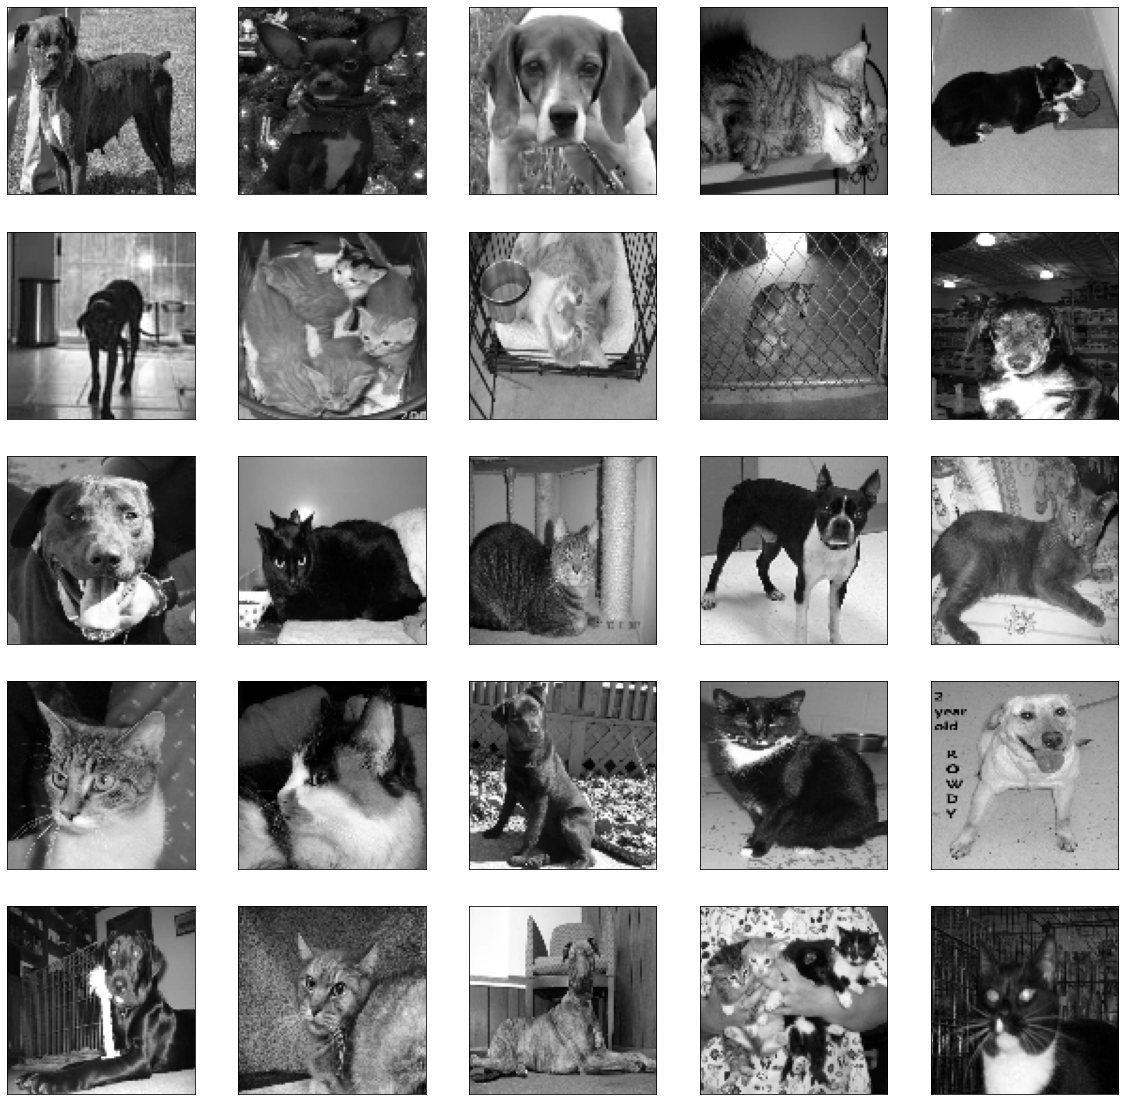

In [ ]:
#Manipular y visualizar el set
#Lo pasamos a TAMANO_IMG (100x100) y a blanco y negro (solo para visualizar)
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(20,20))

TAMANO_IMG=100

for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap='gray')

In [ ]:
#Variable que contendra todos los pares de los datos (imagen y etiqueta) ya modificados (blanco y negro, 100x100)
datos_entrenamiento = []

In [ ]:
for i, (imagen, etiqueta) in enumerate(datos['train']): #Todos los datos
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) #Cambiar tamano a 100,100,1
  datos_entrenamiento.append([imagen, etiqueta])

In [ ]:
#Ver los datos del primer indice
datos_entrenamiento[0]

[array([[[242],
         [190],
         [105],
         ...,
         [189],
         [195],
         [143]],
 
        [[230],
         [130],
         [ 88],
         ...,
         [188],
         [179],
         [187]],
 
        [[170],
         [ 93],
         [ 84],
         ...,
         [131],
         [158],
         [168]],
 
        ...,
 
        [[112],
         [173],
         [164],
         ...,
         [141],
         [152],
         [119]],
 
        [[140],
         [151],
         [172],
         ...,
         [ 96],
         [150],
         [152]],
 
        [[ 92],
         [112],
         [168],
         ...,
         [ 44],
         [ 52],
         [ 47]]], dtype=uint8), <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [ ]:
#Ver cuantos datos tengo en la variable
len(datos_entrenamiento)

23262

In [ ]:
#Preparar mis variables X (entradas) y y (etiquetas) separadas

X = [] #imagenes de entrada (pixeles)
y = [] #etiquetas (perro o gato)

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [ ]:
X

[array([[[242],
         [190],
         [105],
         ...,
         [189],
         [195],
         [143]],
 
        [[230],
         [130],
         [ 88],
         ...,
         [188],
         [179],
         [187]],
 
        [[170],
         [ 93],
         [ 84],
         ...,
         [131],
         [158],
         [168]],
 
        ...,
 
        [[112],
         [173],
         [164],
         ...,
         [141],
         [152],
         [119]],
 
        [[140],
         [151],
         [172],
         ...,
         [ 96],
         [150],
         [152]],
 
        [[ 92],
         [112],
         [168],
         ...,
         [ 44],
         [ 52],
         [ 47]]], dtype=uint8), array([[[146],
         [115],
         [ 92],
         ...,
         [103],
         [ 72],
         [ 82]],
 
        [[128],
         [ 65],
         [ 77],
         ...,
         [128],
         [ 70],
         [ 97]],
 
        [[ 82],
         [ 66],
         [ 57],
         ...,
       

In [ ]:
#Normalizar los datos de las X (imagenes). Se pasan a numero flotante y dividen entre 255 para quedar de 0-1 en lugar de 0-255
import numpy as np

X = np.array(X).astype(float) / 255

In [ ]:
#Convertir etiquetas en arreglo simple
y = np.array(y)

In [ ]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
X.shape

(23262, 100, 100, 1)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

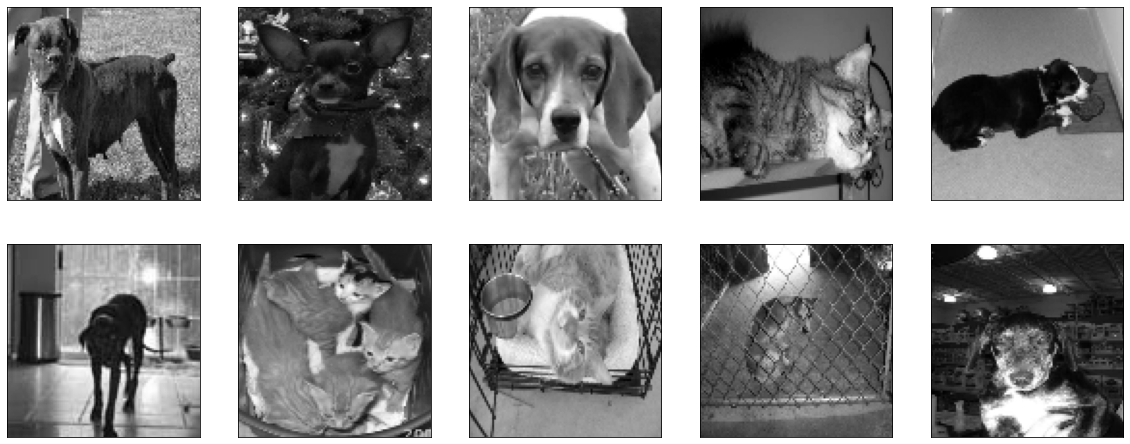

In [ ]:
#ver las imagenes de la variable X sin modificaciones por aumento de datos
plt.figure(figsize=(20, 8))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X[i].reshape(100, 100), cmap="gray")

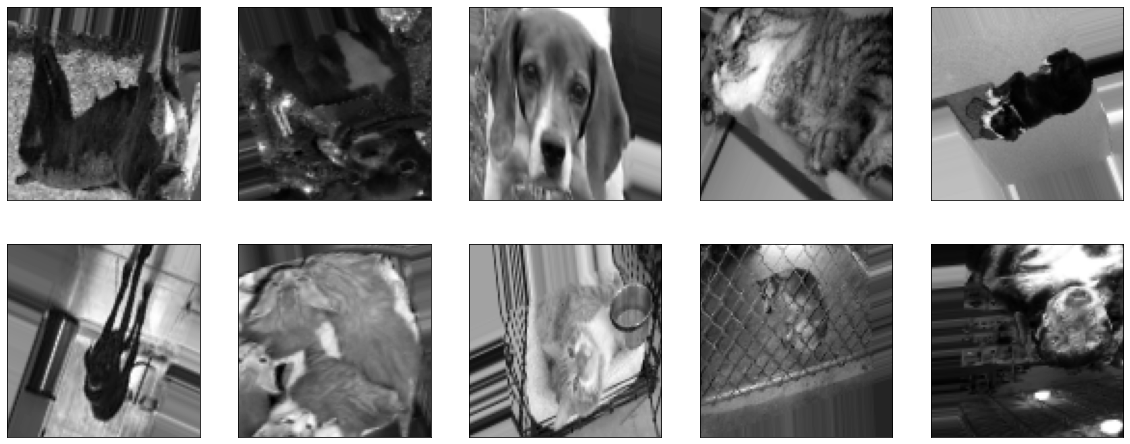

In [ ]:
#Realizar el aumento de datos con varias transformaciones. Al final, graficar 10 como ejemplo
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen, etiqueta in datagen.flow(X, y, batch_size=10, shuffle=False):
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(100, 100), cmap="gray")
  break

In [ ]:
modeloCNN_AD = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
modeloCNN_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [ ]:
#Separar los datos de entrenamiento y los datos de pruebas en variables diferentes

len(X) * .85 #19700
len(X) - 19700 #3562

X_entrenamiento = X[:19700]
X_validacion = X[19700:]

y_entrenamiento = y[:19700]
y_validacion = y[19700:]

In [ ]:
#Usar la funcion flow del generador para crear un iterador que podamos enviar como entrenamiento a la funcion FIT del modelo
data_gen_entrenamiento = datagen.flow(X_entrenamiento, y_entrenamiento, batch_size=32)

In [ ]:
tensorboardCNN_AD = TensorBoard(log_dir='logs-new/cnn_AD')

modeloCNN_AD.fit(
    data_gen_entrenamiento,
    epochs=150, batch_size=32,
    validation_data=(X_validacion, y_validacion),
    steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))),
    validation_steps=int(np.ceil(len(X_validacion) / float(32))),
    callbacks=[tensorboardCNN_AD]
)

Epoch 1/150
616/616 [==============================] - 37s 43ms/step - loss: 0.6851 - accuracy: 0.5433 - val_loss: 0.7009 - val_accuracy: 0.5382
Epoch 2/150
616/616 [==============================] - 26s 43ms/step - loss: 0.6631 - accuracy: 0.5997 - val_loss: 0.6442 - val_accuracy: 0.6261
Epoch 3/150
616/616 [==============================] - 25s 41ms/step - loss: 0.6491 - accuracy: 0.6233 - val_loss: 0.6245 - val_accuracy: 0.6569
Epoch 4/150
616/616 [==============================] - 25s 41ms/step - loss: 0.6357 - accuracy: 0.6409 - val_loss: 0.6011 - val_accuracy: 0.6771
Epoch 5/150
616/616 [==============================] - 25s 41ms/step - loss: 0.6203 - accuracy: 0.6607 - val_loss: 0.6472 - val_accuracy: 0.6244
Epoch 6/150
616/616 [==============================] - 25s 41ms/step - loss: 0.6071 - accuracy: 0.6684 - val_loss: 0.5546 - val_accuracy: 0.7190
Epoch 7/150
616/616 [==============================] - 25s 41ms/step - loss: 0.5932 - accuracy: 0.6845 - val_loss: 0.5558 - val_ac

In [ ]:
modeloCNN_AD.save('ModeloPerros-Gatos.h5')

In [ ]:
# import cv2
# def clasificar_imagen(modelo):
#     # Paso 1: Cargar el modelo previamente entrenado
#     modelo_cargado = tf.keras.models.load_model(modelo)

#     # Paso 2: Tomar una foto utilizando la cámara de tu computadora y guardarla en un archivo
#     cap = cv2.VideoCapture(0)
#     cap.set(cv2.CAP_PROP_BUFFERSIZE, 1)
#     ret, frame = cap.read()
#     cap.release()
#     cv2.imwrite('foto.png', frame)

#     # Paso 3: Cargar la imagen capturada utilizando la librería TensorFlow
#     imagen = tf.keras.preprocessing.image.load_img('foto.png', target_size=(224, 224))

#     # Paso 4: Preprocesar la imagen para que tenga las mismas dimensiones y características que las imágenes que utilizaste para entrenar tu modelo
#     imagen_array = tf.keras.preprocessing.image.img_to_array(imagen)
#     imagen_array = np.expand_dims(imagen_array, axis=0)
#     imagen_array /= 255.

#     # Paso 5: Pasar la imagen preprocesada como entrada a tu modelo y obtener la predicción
#     prediccion = modelo_cargado.predict(imagen_array)

#     # Paso 6: Devolver la predicción como salida de la función
#     return prediccion
